In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


## Import data

In [3]:
data_df = pd.read_csv("./data.csv")

In [4]:
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data/len(data_df)*100
    print(f"Column {col}: has {missing_percent}% missing data")

Column id: has 0.0% missing data
Column diagnosis: has 0.0% missing data
Column radius_mean: has 0.0% missing data
Column texture_mean: has 0.0% missing data
Column perimeter_mean: has 0.0% missing data
Column area_mean: has 0.0% missing data
Column smoothness_mean: has 0.0% missing data
Column compactness_mean: has 0.0% missing data
Column concavity_mean: has 0.0% missing data
Column concave points_mean: has 0.0% missing data
Column symmetry_mean: has 0.0% missing data
Column fractal_dimension_mean: has 0.0% missing data
Column radius_se: has 0.0% missing data
Column texture_se: has 0.0% missing data
Column perimeter_se: has 0.0% missing data
Column area_se: has 0.0% missing data
Column smoothness_se: has 0.0% missing data
Column compactness_se: has 0.0% missing data
Column concavity_se: has 0.0% missing data
Column concave points_se: has 0.0% missing data
Column symmetry_se: has 0.0% missing data
Column fractal_dimension_se: has 0.0% missing data
Column radius_worst: has 0.0% missing

In [7]:
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
X = data_df.iloc[:,[0] + list(range(2,32))].values

In [9]:
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

In [10]:
Y = data_df.iloc[:,1].values

In [11]:
Y 

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [12]:
#Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,2:])
X[:,2:] = imputer.transform(X[:,2:])

In [13]:
X

array([[8.4230200e+05, 1.7990000e+01, 1.0380000e+01, ..., 2.6540000e-01,
        4.6010000e-01, 1.1890000e-01],
       [8.4251700e+05, 2.0570000e+01, 1.7770000e+01, ..., 1.8600000e-01,
        2.7500000e-01, 8.9020000e-02],
       [8.4300903e+07, 1.9690000e+01, 2.1250000e+01, ..., 2.4300000e-01,
        3.6130000e-01, 8.7580000e-02],
       ...,
       [9.2695400e+05, 1.6600000e+01, 2.8080000e+01, ..., 1.4180000e-01,
        2.2180000e-01, 7.8200000e-02],
       [9.2724100e+05, 2.0600000e+01, 2.9330000e+01, ..., 2.6500000e-01,
        4.0870000e-01, 1.2400000e-01],
       [9.2751000e+04, 7.7600000e+00, 2.4540000e+01, ..., 0.0000000e+00,
        2.8710000e-01, 7.0390000e-02]])

## Encode Categorical Data
### Encode dependent variable (Y)

In [14]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [15]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Splitting the dataset (X = data, Y = output) into the Training set and Test set

In [16]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [17]:
print(X)
#print(len(Y))

[[8.4230200e+05 1.7990000e+01 1.0380000e+01 ... 2.6540000e-01
  4.6010000e-01 1.1890000e-01]
 [8.4251700e+05 2.0570000e+01 1.7770000e+01 ... 1.8600000e-01
  2.7500000e-01 8.9020000e-02]
 [8.4300903e+07 1.9690000e+01 2.1250000e+01 ... 2.4300000e-01
  3.6130000e-01 8.7580000e-02]
 ...
 [9.2695400e+05 1.6600000e+01 2.8080000e+01 ... 1.4180000e-01
  2.2180000e-01 7.8200000e-02]
 [9.2724100e+05 2.0600000e+01 2.9330000e+01 ... 2.6500000e-01
  4.0870000e-01 1.2400000e-01]
 [9.2751000e+04 7.7600000e+00 2.4540000e+01 ... 0.0000000e+00
  2.8710000e-01 7.0390000e-02]]


## Feature Scaling

In [18]:
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])

In [19]:
X_test[:,:] = sc.transform(X_test[:,:])

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 70}
Training Accuracy: 0.9956043956043956
Test Accuracy: 0.9649122807017544


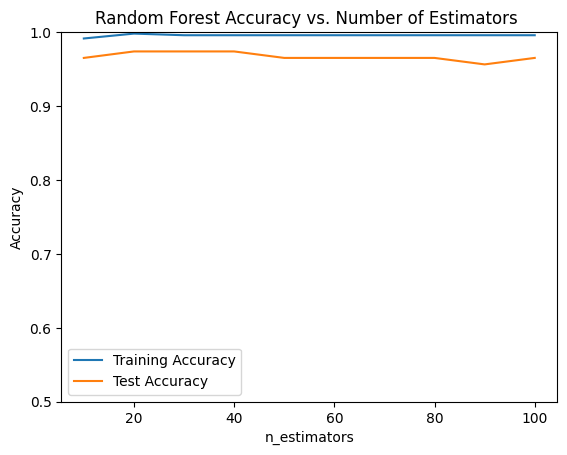

In [20]:
# 1. Random Forest

param_grid = {
    'n_estimators': range(10, 101, 10),  # Number of trees
    'max_depth': [None, 10, 20, 30],     # Depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for the best split
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, Y_train)

# Get best model from GridSearch
best_rf = grid_search.best_estimator_

# Evaluate accuracy of the best model on training and test sets
train_accuracy = accuracy_score(Y_train, best_rf.predict(X_train))
test_accuracy = accuracy_score(Y_test, best_rf.predict(X_test))

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Visualize accuracy with respect to number of estimators from tuned model
train_accuracies = []
test_accuracies = []
estimators = range(10, 101, 10)

for n in estimators:
    # Use the best hyperparameters but vary n_estimators
    tuned_rf = RandomForestClassifier(
        n_estimators=n, 
        max_depth=grid_search.best_params_['max_depth'], 
        min_samples_split=grid_search.best_params_['min_samples_split'], 
        max_features=grid_search.best_params_['max_features'],
        random_state=42
    )
    tuned_rf.fit(X_train, Y_train)
    train_accuracies.append(accuracy_score(Y_train, tuned_rf.predict(X_train)))
    test_accuracies.append(accuracy_score(Y_test, tuned_rf.predict(X_test)))

# Plot the accuracies
plt.plot(estimators, train_accuracies, label='Training Accuracy')
plt.plot(estimators, test_accuracies, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators ')
plt.ylim(0.50, 1.00) 
plt.legend()
plt.show()

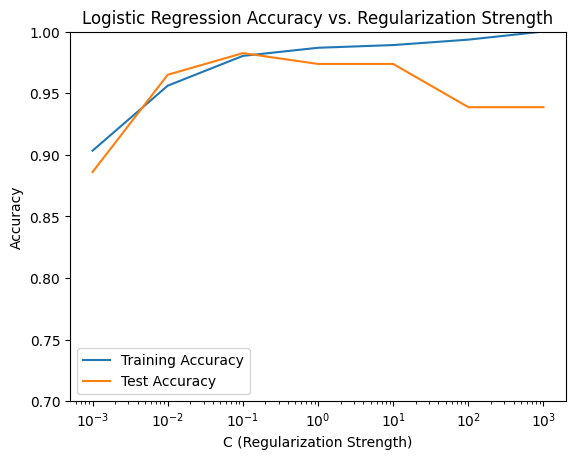

In [21]:
#2 Logistic regression
from sklearn.linear_model import LogisticRegression

train_accuracies = []
test_accuracies = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42, max_iter=5000)
    log_reg.fit(X_train, Y_train)
    train_accuracies.append(accuracy_score(Y_train, log_reg.predict(X_train)))
    test_accuracies.append(accuracy_score(Y_test, log_reg.predict(X_test)))

plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Regularization Strength')
plt.ylim(0.70,1.00)
plt.legend()
plt.show()


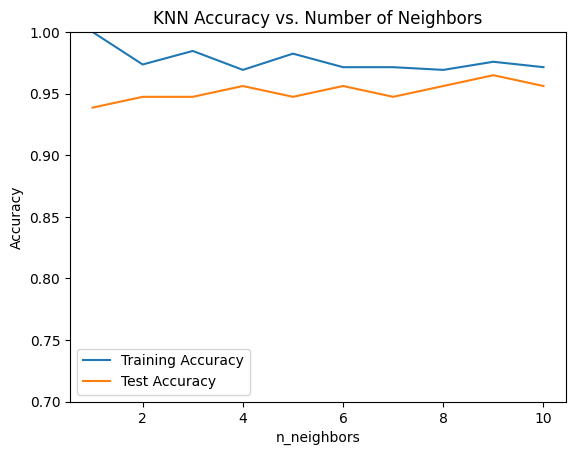

In [22]:
#3 KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []
neighbors = range(1, 11)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracies.append(accuracy_score(Y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(Y_test, knn.predict(X_test)))

plt.plot(neighbors, train_accuracies, label='Training Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.ylim(0.70,1.00)
plt.legend()
plt.show()

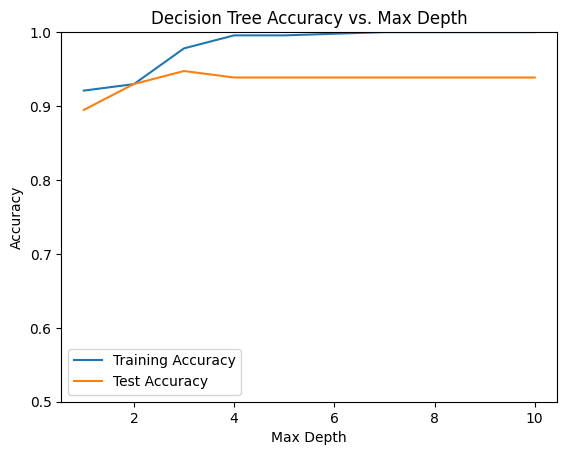

In [23]:
#4 Decision tree
from sklearn.tree import DecisionTreeClassifier

train_accuracies = []
test_accuracies = []
max_depths = range(1, 11)

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, Y_train)
    train_accuracies.append(accuracy_score(Y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(Y_test, dt.predict(X_test)))

plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.ylim(0.50,1.00)
plt.legend()
plt.show()
